# Using matrices with transformations
> TBD

## Contents
TBD

## Intro
We saw in the previous chapter that any linear transformation in 3D can be specified by knowing how it affects the three standard basis vectors $ e1 $, $ e2 $, and $ e3 $.

This means that exactly 9 numbers uniquely identify the effects of linear transformation. When arranged appropriately, the numbers that tell us how to compute a linear transformation are called a *matrix*.

Note that these matrices should be considered *computational tools* or a *notation* that will help use calculate these transformations more efficiently, but ultimately, we will be doing the same transformations we performed on the previous chapters: rotations, scaling, reflection, etc.

The underlying idea would be to arrange in the matrix the information of that tells us how the linear transformation affects the standar basis vectors.

## Representing linear transformations with matrices

Let $ A $ be a linear transformation and we know that:

$
A(e1) = (1, 1, 1) \\
A(e2) = (1, 0, -1) \\
A(e3) = (0, 1, 1)
$

This information completely specifies the $ A $ transformation, in a way that it can be applied to any vector.

Because we will reuse this concept over and over, it warrants a special notation called *matrix notation*.



### Writing vectors and linear transformations as matrices

Matrices are rectangular grids of numbers. Their shape (i.e. arrangement) tells us how to interpret them.

For instance, a matrix that is a single column of numbers as a vector, with its entries being the coordinates ordered from top to bottom is called a *column vector*.

For example, the standard basis can be written as three column vectors as:

$
e1 = \begin{pmatrix}
        1 \\
        0 \\
        0
    \end{pmatrix}
,\hspace{1ex}
e2 = \begin{pmatrix}
        0 \\
        1 \\
        0
    \end{pmatrix}
,\hspace{1ex}
e3 = \begin{pmatrix}
        0 \\
        0 \\
        1
    \end{pmatrix}
$

For our purposes, this notation means the same as $ e1=(1, 0, 0) $, $ e2=(0, 1, 0) $, $ e3 = (0, 0, 1) $.

As a consequence, we can denote A transformation as:

$
A(e1) = \begin{pmatrix}
        1 \\
        1 \\
        1
    \end{pmatrix}
,\hspace{1ex}
e2 = \begin{pmatrix}
        1 \\
        0 \\
        -1
    \end{pmatrix}
,\hspace{1ex}
e3 = \begin{pmatrix}
        0 \\
        1 \\
        1
    \end{pmatrix}
$

And the matrix representing $ A $ transformation is the 3x3 grid of numbers consisting of theses vectors squashed together:

$
A = \begin{pmatrix}
        1 & 1 & 0 \\
        1 & 0 & 1\\
        1 & -1 & 1
    \end{pmatrix}
$

In 2D, a column vector consists of two entries. As a result, the linear transformation that scales input vectors by a factor of 2 can be written as:

$
D(e1) = \begin{pmatrix}
2 \\
0
\end{pmatrix}
,\hspace{1ex} 
D(e2) = \begin{pmatrix}
0 \\
2
\end{pmatrix}
$

Or using the matrix notation:

$
D = \begin{pmatrix}
2 & 0 \\
0 & 2 
\end{pmatrix}
$

Matrices will come in other shapes and sizes, but for now, the focus is in column matrices representing vectors and square matrices representing linear transformations.

The next step will consist in evaluating a linear transformation given its matrix.

### Multiplying a matrix with a vector

Let $ B $ a linear transformation represented as a matrix and $ v $ a vector also represented as a matrix:

$
B = \begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1 
\end{pmatrix}
,\hspace{1ex}
v = \begin{pmatrix}
3 \\
-2 \\
5
\end{pmatrix}
$

Then, using the already known procedure for linear transformations, with the only change that we use *column vector* notation, we can say:

$
B(v) = 3 \cdot B(e1) -2 \cdot B(e2) + 5 \cdot B(e3) \\
= 3 \cdot \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} - 2 \cdot \begin{pmatrix}
2 \\
1 \\
0
\end{pmatrix} + 5 \cdot \begin{pmatrix}
1 \\
0 \\
-1
\end{pmatrix} = \begin{pmatrix}
0 \\
0 \\
3
\end{pmatrix} + \begin{pmatrix}
-4 \\
-2 \\
0
\end{pmatrix} + \begin{pmatrix}
5 \\
0 \\
-5
\end{pmatrix} = \begin{pmatrix}
1 \\
-2 \\
-2
\end{pmatrix}
$

This sequence of operations is a special case of an operation called *matrix multiplication*. This can be succinctly denoted as:

$
Bv = \begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix} \begin{pmatrix}
3 \\
-2 \\
5
\end{pmatrix} = \begin{pmatrix}
1 \\
-2 \\
-2
\end{pmatrix}
$

As opposed to multiplying numbers, the order matters when you multiply matrices. In particular $ Bv $ is a valid product but $ vB $ is not.

Now, we're in a position to write Python code that multiplies a matrix by a vector:

In [3]:
from my_vectors import *

B = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)

v = (3, -2, 5)

# Note that the B matrix is arranged as a set of rows,
# rather than as a set of columns
# However, you can easily get the columns using `zip`

print('columns of the matrix B: {}'.format(list(zip(*B))))

def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s,v in zip(scalars, vectors)]
    return add(*scaled)

def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

print('B v = {}'.format(multiply_matrix_vector(B, v)))

columns of the matrix B: [(0, 0, 1), (2, 1, 0), (1, 0, -1)]
B v = (1, -2, -2)


Let's dissect a little bit, howe we got to this succinct Python implementation:

Firstly, we define our matrix as a tuple of tuples, with the first tuple containing the first row, the second tuple the second row, etc.

This is just for convenience, as it is easier to write that way:

```Python
B = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)
```

Then we define our `v` vector the usual way:

```Python
v = (3, -2, 5)
```

Now, we need to find an efficient way to do:

```Python
3 * (0, 0, 1) + -2 * (2, 1, 0) + 5 * (1, 0, -1)
```

Getting the columns from B is easy using the `zip(...)` function, as it will *aggregate* the first elements of all the tuples into a first tuple, the second elements into a second tuple, etc.

Remember that `zip(...)` expects a variable number of *iterables* of the same size:

```Python
list(zip(('a', 'b', 'c'), (1, 2, 3), ('x', 'y', 'z'))) = 
[('a', 1, 'x'), ('b', 2, 'y'), ('c', 3, 'z')]
```

Note that we cannot feed `B` directly into `zip(...)` as it won't have the desired effect on account of `B` being a single tuple containing multiple tuples within it:

```Python
list(zip(((0, 2, 1), (0, 1, 0), (1, 0, -1)))) = 
[
  (
      (0, 2, 1)
  ), 
  (
      (0, 1, 0)
  ), 
  (
      (1, 0, -1)
  )
]
```

Fortunately, we can use the `*` operator to *flatten* `B` before passing it to `zip(...)`. This will have the effect of injecting the actual matrix rows as arguments to the `zip(...)` function:

```Python
list(zip((0, 2, 1), (0, 1, 0), (1, 0, -1))) = [(0, 0, 1), (2, 1, 0), (1, 0, -1)]
list(zip(*B)) = [(0, 0, 1), (2, 1, 0), (1, 0, -1)]
```

Now that we've got the matrix columns in an iterable, we can focus on writing the function that will take each of the coordinates of the vector `v` and perform the scalar multiplication of the first coordinate by the first column (*vector*), add it to the scalar multiplication of the second coordinate by the second column, etc.

But we already define such function in the previous chapter! &mdash; the `linear_combination(...)` function:

```Python
def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s,v in zip(scalars, vectors)]
    return add(*scaled)
```

We just need to pass `v` as `scalars` and the columns of the matrix in `vectors` (note that the second argument is a variable argument list):

Thus, to perform the desired multiplication, we have to do:

```Python
linear_combination((3, -2, 5), (0, 0, 1), (2, 1, 0), (1, 0, -1)) = (1, -2, -2)
```

We're almost there: we just need to define now a Python function that will name that operation:

```Python
def multiply_matrix_vector(matrix_columns, vector):
    return linear_combination(vector, matrix_columns)
```

However, if we try to invoke the function using:

```Python
multiply_matrix_vector(((0, 0, 1), (2, 1, 0), (1, 0, -1)), (3, -2, 5))
```

it will fail, because `linear_combination(...)` requires a variable number of tuples as the second argument, and we're passing a tuple of tuples. We need to *flatten* again this argument using the `*` operator:

```Python
def multiply_matrix_vector(matrix_columns, vector):
    return linear_combination(vector, *matrix_columns)
```

This let us define our first functional `multiply_matrix_vector(...)` function:

```Python
multiply_matrix_vector(((0, 0, 1), (2, 1, 0), (1, 0, -1)), (3, -2, 5)) = (1, -2, -2)
```

Now for the final step &mdash; it wouldn't be a good DX if the consumer of the `multiply_matrix_vector(...)` would have to convert the rows of the matrix into columns. It will be much better if we do it ourselves as part of the function implementation:

```Python
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *(zip(*matrix)))
```

or more succinctly:
```Python
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))
```


Now we're ready to test the function with hardcoded arguments and variables too:



In [1]:
def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s,v in zip(scalars, vectors)]
    return add(*scaled)

def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

print(multiply_matrix_vector(((0, 2, 1), (0, 1, 0), (1, 0, -1)), (3, -2, 5)))

multiply_matrix_vector(B, v)

NameError: name 'scale' is not defined

Now that we have a way to do the multiplication programmatically, we can explore mnemonic recipes for multiplying a matrix by a vector.

Consider the following *prototypical* matrix multiplication:

$
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix} = x \cdot \begin{pmatrix}
a \\
d \\
g
\end{pmatrix} + y \cdot \begin{pmatrix}
b \\
e \\
h
\end{pmatrix} + z \cdot \begin{pmatrix}
c \\
f \\
i
\end{pmatrix} = \begin{pmatrix}
a \cdot x + b \cdot y + c \cdot z \\
d \cdot x + e \cdot y + f \cdot z \\
g \cdot x + h \cdot y + i \cdot z
\end{pmatrix}
$

The first recipe is that each coordinate of the output vector is a function of all the coordinates of the input vector:

$
f(x, y, z) = a \cdot x + b \cdot y + c \cdot z
$

Moreover, this is a linear function, in the sense that it is a sum of number of times each variable.

The second mnemonic recipe presents the same formula as the result of doing *dot products* of the corresponding matrix rows by the column vector:

$
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix} = \begin{pmatrix}
(a, b, c) \cdot (x, y, z) \\
(d, e, f) \cdot (x, y, z) \\
(g, h, i) \cdot (x, y, z)
\end{pmatrix} = = \begin{pmatrix}
a \cdot x + b \cdot y + c \cdot z \\
d \cdot x + e \cdot y + f \cdot z \\
g \cdot x + h \cdot y + i \cdot z
\end{pmatrix}
$

Note that the same mnemonics will apply to 2D transformations:

$
\begin{pmatrix}
j & k \\
l & m
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} = x \cdot \begin{pmatrix}
j \\
l
\end{pmatrix} + y \cdot \begin{pmatrix}
k \\
m 
\end{pmatrix} = \begin{pmatrix}
(j, k) \cdot (x, y) \\
(l, m) \cdot (x, y)
\end{pmatrix} = \begin{pmatrix}
j \cdot x + k \cdot y \\
l \cdot x + m \cdot y
\end{pmatrix}
$


### Composing linear transformations by matrix multiplication

We know from the previous chapter that the composition of a linear transformation is also a linear transformation. Because any linear transformation can be represented by a matrix, any composition of linear transformations can also be represented by a matrix.

This fact has profound consequences in terms of the computing power to apply transformations. If you were to apply a big number of transformations to a vector, each of the function calls `f1(f2(f3(...fn(v))))` would represent some overhead, while if you could represent $ f_1 \circ f_2 \circ f_3 \circ ... \circ f_n $ by a matrix, applying it to a vector would be just a handful of simple computations (additions and multiplications).

Let $ A $ and $ B $ be two linear transformations that we want to compose for a given vector $ v = (x, y, z) $. Thus we're interested in $ A(B(v)) $.

$
A = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}, \hspace{1ex}
B = \begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix}
$

In order to compute the transformation, we would need to first apply the $ B $ transformation to $ v $, which would render a 3D column vector, which we would then apply to $ A $ which would render the definitive 3d column vector that is the result of the composition:

$
A(B(v)) = ABv = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
$

So the problem lies in determining, what should be the result of multiplying $ AB $. 

We know that ultimately, $ AB $ should be a 3x3 matrix, so we need are interesting in calculating all those question marks:

$
AB = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix} = \begin{pmatrix}
? & ? & ? \\
? & ? & ? \\
? & ? & ?
\end{pmatrix}
$


We also know that each of the columns of the transformation is the effect of applying the given transformation to the vectors of the standard basis.

That is:

$
B(e1) = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} \\
B(e2) = \begin{pmatrix}
2 \\
1 \\
0
\end{pmatrix} \\
B(e3) = \begin{pmatrix}
1 \\
0 \\
-1
\end{pmatrix}
$

But also, in virtue of the last fact, the first column of the resulting matrix, will be the effect of $ AB(e1) $, the second column will be $ A(B(e2)) $ etc.

Therefore:
$
A(B(e1)) = ABe1 = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} = \begin{pmatrix}
0 \\
1 \\
1
\end{pmatrix}
$

And similarly:
$
A(B(e2)) = ABe2 = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
2 \\
1 \\
0
\end{pmatrix} = \begin{pmatrix}
3 \\
2 \\
1
\end{pmatrix} \\
A(B(e3)) = ABe3 = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
0 \\
0
\end{pmatrix}
$

And fitting all the intermediate results together into a single matrix:

$
AB = \begin{pmatrix}
0 & 3 & 1 \\
1 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$


As a takeaway, we haven't reivented the wheel &mdash; we've just leaned once more into concepts that we already knew to come up with the *matrix multiplication*:

![Getting to matrix multiplication](../images/getting_to_matrix_multiplication.png)

AS a mnemonic rule, multiplying a 3x3 matrix by a column vector is the same as doing the *dot product* of a given row by a given column:

$ 
AB = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix} = \\
\begin{pmatrix}
(1, 1, 0) \cdot (0, 0, 1) & (1, 1, 0) \cdot (2, 1, 0) & (1, 1, 0) \cdot (1, 0, -1) \\
(1, 0, 1) \cdot (0, 0, 1) & (1, 0, 1) \cdot (2, 1, 0) & (1, 0, 1) \cdot (1, 0, -1) \\
(1, -1, 1) \cdot (0, 0, 1) & (1, -1, 1) \cdot (2, 1, 0) & (1, -1, 1) \cdot (1, 0, -1)
\end{pmatrix} = \\
= \begin{pmatrix}
0 & 3 & 1 \\
1 & 2 & 0 \\
1 & 1 & 0 \\
\end{pmatrix}
$


That is, each of the $ a_ij $ elements of the matrix, with $ i $ being the row index and $ j $ being the column index is the result of dot multiplication of the *ith* row vector from $ A $ by the *jth* row vector from $ B $.

![Matrix multiplication](../images/matrix_multiplication.png)

Note that the same rule applies to matrices of lower dimension:

$
\begin{pmatrix}
1 & 2 \\
3 & 4 
\end{pmatrix}
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix} = \begin{pmatrix}
2 & -1 \\
4 & -3
\end{pmatrix}
$

### Implementing matrix multiplication

Learning how to do matrix multiplication by hand is fine for educational purposes, but the ultimate goal is to define a function that will do that tedious work for us.

When using Python, the fact that each of the elements is the result of the dot product of the corresponding row and column from the given matrices is more conducive to this calculation:

Again, this will require a little bit of an staged approach.

Let's denote the elements of the resulting matrix as `a00`, `a01`, etc.

$
AB = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{pmatrix}
$

We know that $ a_ij $ will be the result of the dot product of row i from $ A $ by column j from $ B $. We also know that we can get the column vectors from B doing `zip(*b)`.

Thus, the first brute force approach for the `matrix_multiply(...)` function will be:


In [14]:
from my_vectors import *

a = (
    (1, 1, 0),
    (1, 0, 1),
    (1, -1, 1)
)
b = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)

def matrix_multiply(a, b):
    b_cols = tuple(zip(*b))
    a00 = dot(a[0], b_cols[0])
    a01 = dot(a[0], b_cols[1])
    a02 = dot(a[0], b_cols[2])
    a10 = dot(a[1], b_cols[0])
    a11 = dot(a[1], b_cols[1])
    a12 = dot(a[1], b_cols[2])
    a20 = dot(a[2], b_cols[0])
    a21 = dot(a[2], b_cols[1])
    a22 = dot(a[2], b_cols[2])        
    return (
        (a00, a01, a02),
        (a10, a11, a12),
        (a20, a21, a22)
    )


matrix_multiply(a, b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

Obviously, that's far from an ideal implementation, but it gives us some hints about the kind of loops that will be needed &mdash; we will need an inner iteration over cols of b, and an outer iteration over the rows of a.

This second implementation focuses on the inner iteration:

In [17]:
from my_vectors import *

a = (
    (1, 1, 0),
    (1, 0, 1),
    (1, -1, 1)
)
b = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)

def matrix_multiply(a, b):
    result_first_row = tuple(dot(a[0], col_from_b) for col_from_b in zip(*b))
    result_second_row = tuple(dot(a[1], col_from_b) for col_from_b in zip(*b))
    result_third_row = tuple(dot(a[2], col_from_b) for col_from_b in zip(*b))
    return (result_first_row, result_second_row, result_third_row)

matrix_multiply(a, b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

We're really close to our final implementation, we just need to add the outer loop, so that no variable definition is needed:

In [19]:
from my_vectors import *

a = (
    (1, 1, 0),
    (1, 0, 1),
    (1, -1, 1)
)
b = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)

def matrix_multiply(a, b):
    return tuple(
        tuple(dot(row_from_a, col_from_b) for col_from_b in zip(*b)) 
        for row_from_a in a
    )

matrix_multiply(a, b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

Note that this function works for matrices of any dimension:

In [20]:
from my_vectors import *

c = (
    (1, 2),
    (3, 4)
)
d = (
    (0, -1),
    (1, 0)
)

def matrix_multiply(a, b):
    return tuple(
        tuple(dot(row_from_a, col_from_b) for col_from_b in zip(*b)) 
        for row_from_a in a
    )

matrix_multiply(c, d)

((2, -1), (4, -3))

### 3D animation with matrix transformations

To animate a 3D model, we redraw a transformed version of the original model in each frame. To make the model appear to move or change over time, we need to use different transformations as the time progresses. If these transformations are linear transformations specified by matrices, we will need a new matric for every new frame of the animation.

Because *PyGame*'s built-in clock keeps track of time in milliseconds, we can generate matrices whose entries depend on time. That is, we can think of every matrix as a function that takes the current time and returns a matrix for that given time:

$
t \rightarrow \begin{pmatrix}
a_{00}(t) & a_{01}(t) & a_{02}(t) \\
a_{10}(t) & a_{11}(t) & a_{12}(t) \\
a_{20}(t) & a_{21}(t) & a_{22}(t)
\end{pmatrix}
$

The following matrix, would be an example of such transformation that depends on time:

$
\begin{pmatrix}
cos(t) & 0 & -sin(t) \\
0 & 1 & 0 \\
sin(t) & 0 & cos(t)
\end{pmatrix}
$

| NOTE: |
| :---- |
| Given any value of $ t $, the matrix represents the same linear transformation as `rotate_y_by(t)`. |

Let's use this transformation when drawing the teapot, so that it rotates over time around the y axis. Note that instead of using *PyOpenGL* methods as we did in previous exercises, the idea of this exercise is to apply the transformation to the loaded triangles to achieve the same effect.

That is, we're looking for a new function:

```Python
draw_model(..., get_matrix=<transformation-to-be-applied>):
...
```

that will allow us to configure a transformation matrix that will be applied to the faces of the 3D model on each and every frame. The effect will be the same as using `glRotatef(...)` function.

| NOTE: |
| :---- |
| You can find the standalone project for this exercise in [`02-draw-animated-transformation`](../02-draw-animated-transformation). |

In [2]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from math import sin, cos


# define the rotate_y_by(t) transformation as a function
def get_rotation_matrix(t):
    seconds = t / 1000
    return (
      (cos(seconds), 0, -sin(seconds)),
      (0, 1, 0),
      (sin(seconds), 0, cos(seconds))
    )


draw_model(load_triangles(), get_matrix=get_rotation_matrix)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 0

| NOTE: |
| :---- |
| What about the axis, boy? According to the theory, whenever you do a rotation about the y axis, the y coordinates of all the vectors should stay the same. That is consistent with the transformation matrix (the second column vector is $(0, 1, 0)), but the animation seem to be rotated around the z-axis: the z-axis of the teapot does not seem to change! |

Let's investigate a little bit more what's going on, firstly, using our good-old `draw3d` to see if we get the same behavior.

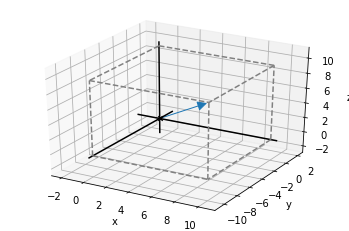

In [10]:
from my_draw3d import draw3d, Arrow3D, Box3D, blue


draw3d(
    Arrow3D((10, -10, 10), color=blue),
    Box3D(10, -10, 10)
    )

If we rotate the vector $ (10, -10, 10) $ about the z axis `pi / 4` the vector should be enclosed in the plane y = 0 (it should be (x, 0, 10), with x something greater than 10).

(14.142135623730951, 0.0, 10)


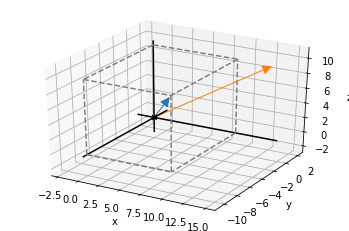

In [15]:
from my_draw3d import draw3d, Arrow3D, Box3D, blue, orange
from my_transformations import rotate_z_by
from math import pi


rotated_vector = rotate_z_by(pi / 4)((10, -10, 10))

print(rotated_vector)

The result is consistend with our expectations. However, that does not happen on our teapot animation.

Let's see the results of rotating the teapot a given angle about x, y and z to understand what might be going on:

In [17]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from my_transformations import *
from math import pi


draw_model(polygon_map(rotate_x_by(pi / 4), load_triangles()))

SystemExit: 0

In [18]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from my_transformations import *
from math import pi


draw_model(polygon_map(rotate_y_by(pi / 4), load_triangles()))

SystemExit: 0

In [19]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from my_transformations import *
from math import pi


draw_model(polygon_map(rotate_z_by(pi / 4), load_triangles()))

SystemExit: 0

The examples and the following diagram explains what seems to be the problem:

![Axis in OpenGL](../images/axis_in_opengl.png)

Rotation about the x-axis is consistent with our expectations, but y and z seem to have switched.

By convention, *OpenGL* is a right-handed system, with the following disposition of axes:

![Axis notation in OpenGL](../images/axis_notation_opengl.png)

Note that this doesn't break the rules of the system we used when discussing about axis orientation and the right-hand rule for cross product &mdash; it is simply that *OpenGL* decided to rotate the axis, so that z measures the depth, while y measures the height.

Now that you think of it, it may make more sense than the one we were using, as when z = 0, you have the 2D drawing system.

## Interpreting matrices of different shapes

The `matrix_multiply(...)` function we have defined do not make any assumptions with regards to the size of the input matrices &mdash; it can handle well multiplications of matrices of higher sizes like 5-by-5:

In [3]:
from my_matrices import matrix_multiply

a = (
    (-1, 0, -1, -2, -2), 
    (0, 0, 2, -2, 1), 
    (-2, -1, -2, 0, 1), 
    (0, 2, -2, -1, 0), 
    (1, 1, -1, -1, 0)
    ) 
  
b = (
    (2, 0, 0, -1, 2), 
    (-1, -2, -1, -2, 0), 
    (0, 1, 2, 2, -2), 
    (2, -1, -1, 1, 0), 
    (2, 1, -1, 2, -2)
    ) 
  
  
  # ((-10, -1, 2, -7, 4), (-2, 5, 5, 4, -6), (-1, 1, -4, 2, -2), (-4, -5, -5, -9, 4), (-1, -2, -2, -6, 4))
print(matrix_multiply(a, b))

((-10, -1, 2, -7, 4), (-2, 5, 5, 4, -6), (-1, 1, -4, 2, -2), (-4, -5, -5, -9, 4), (-1, -2, -2, -6, 4))


### Column vectors as matrices

Not only our `matrix_multiply(...)` is well suited to manage multiplications of larger than 3-by-3 matrices, but it also can be used to mutiply matrices by vectors:

In [6]:
from my_matrices import multiply_matrix_vector, matrix_multiply
c =(
    (-1, -1, 0),
    (-2, 1, 2),
    (1, 0, -1))

d = (1, 1, 1)

# (-2, 1, 0)
print(multiply_matrix_vector(c, d))

d_as_a_column_vector = (
    (1,),
    (1,),
    (1,)
)

# ((-2,), (1,), (0,))
print(matrix_multiply(c, d_as_a_column_vector))

(-2, 1, 0)
((-2,), (1,), (0,))


| NOTE: (what's the need for the extra comma?) |
| :--- |
| The extra comma used when defining `d` as a vector is very much needed to let the Python engine identify that value as a tuple of one element, rather than as an int. If you do not include the comma, operations such as `zip(*(1))` will fail. |

Therefore, we have performed the product of a 3x3 matrix by a 3x1 matrix (*column vector*) and the result is a 3x1 matrix:

$
\begin{pmatrix}
-1 & -1 & 0 \\
-2 & 1 & 2 \\
1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = \begin{pmatrix}
-2 \\
1 \\
0
\end{pmatrix}
$

While in Math a column vector can be interchangeably represented as $ v = (-2, 1, 0) $ or as a column vector $ v = \begin{pmatrix}
-2 \\
1 \\
0
\end{pmatrix}
$ Python is not that permissive, so we have to be careful when we use a vector as a simple tuple as `v = (-2, 1, 0)` so that it can be used in functions such as `multiply_matrix_vector(...)` that expect a tuple as a second argument, and when we use a vector as a matrix as in `v = ((-2, ), (1, ), (0, ))` so that it can be used in functions such as `matrix_multiply(...)` that expect matrices as arguments.

The following table summarizes these concepts:

![Math vs. Python](../images/math-vs-python-notations.png)

### What pairs of matrices can be multiplied?

The answer is that the number of columns of the first matrix have to match the number of rows of the second.

As an example, a 2x3 matrix can be multiplied by a 3x4 matrix and results in a 2x4 matrix.
The rules for calculating the resulting matrix are the same we used for square matrices:

$
\begin{pmatrix}
1 & -2 & 0 \\
-1 & -2 & 2
\end{pmatrix}
\begin{pmatrix}
2 & 0 & -1 & 2 \\
0 & -2 & 2 & -2 \\
-1 & -1 & 2 & 1
\end{pmatrix} = \begin{pmatrix}
2 & 4 & -5 & 6 \\
-4 & 2 & 2 & 4
\end{pmatrix}
$

The good news is that we created such a bulletproof implementation of the matrix multiplication that it even works for non-squared matrices:

In [7]:
from my_matrices import matrix_multiply

a = (
    (1, -2, 0),
    (-1, -2, 2)
)

b = (
    (2, 0, -1, 2),
    (0, -2, 2, -2),
    (-1, -1, 2, 1)
)

# ((2, 4, -5, 6), (-4, 2, 1, 4))
print(matrix_multiply(a, b))

((2, 4, -5, 6), (-4, 2, 1, 4))


| NOTE: |
| :---- |
| When identifying the size of a matrix we give the rows first, and then the columns. Therefore a 2x4 (or 2-by-4) matrix is a matrix with 2 rows and 4 columns. |

In [ ]:
We can now make a general statement about the matrices than can be multiplied:
> an n-by-m matrix can be multiplied by an p-by-q matrix if m=p. When that is true, the resulting matrix will be an n-by-q matrix.

### Viewing square and non-square matrices as vector functions

All matrices represent vector functions, and all valid matrix products can be interpreted as composition of these functions.

We've see that a 2x2 matrix is the data required to do a given linear transformation of a 2D vector. In our blackbox mental model for transformation, we can picture it as follows:

![Transformation Mental Model](../images/transformation-mental-model.png)



And we've seen that within that *blackbox* what we're doing is multiplying the given vector by the matrix that represents the transformation:

$
\begin{pmatrix}
1 & 2 \\
0 & 1 
\end{pmatrix}
\begin{pmatrix}
1 \\
1
\end{pmatrix} = \begin{pmatrix}
3 \\
1
\end{pmatrix}
$

Now we can begin to wonder, what would our mental model look for a transformation defined by a non-square matrix?

Consider, for example a matrix:

$
\begin{pmatrix}
-2 & -1 & -1 \\
2 & -2 & 1
\end{pmatrix}
$

That is a 2x3 matrix, and therefore, it can only accept 3xq inputs. In particular, if we're thinking in terms of column vectors, the matrix above will accept a 3D vector column and will result in a 2x1 matrix &mdash; that is, a 2D column vector.

We can generalize as state that:
> an m-by-n matrix defines a function taking n-dimensional vectors as inputs and returning m-dimensional vectors as outputs.

Any such function is linear in the sense that it preserves vector sums and scalar multiples, but it cannot be considered a transformation as it doesn't just modify the input: it returns an entirely different kind of output. Instead of transformation, it is generally referred to as *linear function* or *linear map*.

### Projection as a linear map from 3D to 2D

We already saw a *vector function* that accepted 3D vectors and produced 2D vectors when we were doing projections of 3D vectors on the x, y plane.

This transformation $ P $ took in vectors of the form $ (x, y, z) $ and returned those ones with the z coordinate removed $ (x, y) $.

Let's write this projection as a matrix. First of all, we know that it has to be 2x3 matrix, so that when multiplied to a 3D vector (3x1) returns a 2D vector (2x1).

Next step consists in applying the same knowledge we applied to linear transformations written as square matrices
> each of the columns of the matrices should be effect of applying the transformation to the standard basis vectors.

The same holds for *linear maps*:

$
P((1, 0, 0)) = (1, 0), \hspace{1ex} P((0, 1, 0)) = (0, 1), \hspace{1ex} P((0, 0, 1)) = (0, 0) 
$

Thus,

$
P = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
$

Let's now prove that $ P $ is linear in the sense that it preserves vector sums and scalar multiples (i.e. it preserves linear combinations).

We have to prove that:

$
P(a \cdot v + b \cdot w) = a \cdot P(v) + b \cdot P(w) 
$

but we know that:

$
P(u) = P((u_1, u_2, u_3)) = (u_1, u_2)
$

Therefore:

$
P(a \cdot v + b \cdot w) = P((a \cdot v_1 + b \cdot w_1, a \cdot v_2 + b \cdot w_2, a \cdot v_3 + b \cdot w_3)) \\
= (a \cdot v_1 + b \cdot w_1, a \cdot v_2 + b \cdot v_2) = a \cdot (v_1, v2) + b \cdot (w_1, w_2) \\
= a \cdot P(v) + b \cdot P(w)
$


This can also be visualized in 3D. We want to see that $ P(v + w) = P(v) + P(w) $. This is, applying the projection to a vector sum should be the same as summing up the each of the vector projections:

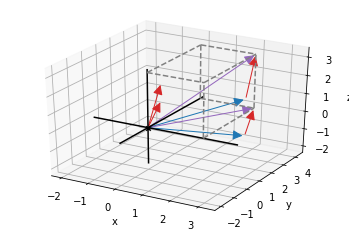

In [13]:
from my_draw3d import *
from my_vectors import *
from my_matrices import *

v = (3, 1, 2)
w = (-1, 3, 1)

p_v = (3, 1, 0) # zeroing the z coordinate to draw it
p_w = (-1, 3, 0)

draw3d(
    Arrow3D(v, color=blue),
    Arrow3D(w, color=red),
    Arrow3D(add(v, w), color=purple),
    Arrow3D(add(v, w), v, color=red),
    Arrow3D(p_v, color=blue),
    Arrow3D(p_w, color=red),
    Arrow3D(add(p_v, p_w), color=purple),
    Arrow3D(add(p_v, p_w), p_v, color=red)
)

The perspective is not very good, but you can sense that the purple vector representing the sum in the 3D space when projected matches the purple vector on the x, y plane.

### Composing linear maps

As all matrices store all of the data required to evaluate a linear function, and we know the rules for multiplying matrices together (the number of columns of the first must match the number of rows of the second) we know when two linear maps can be composed together to create a new linear map.

For example:

$
P = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}, \hspace{1ex} M = \begin{pmatrix}
-1 & -1 & 0 \\
-2 & 1 & 2 \\
1 & 0 & -1
\end{pmatrix}
$

As $ P $ is 2x3 and $ M $ is 3x3, we can compose $ PM $ and create a new *linear map*:

$
PMv = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix} \begin{pmatrix}
-1 & -1 & 0 \\
-2 & 1 & 2 \\
1 & 0 & -1
\end{pmatrix} \begin{pmatrix}
v_1 \\
v_2 \\
v_3
\end{pmatrix} = \begin{pmatrix}
-1 & -1 & 0 \\
-2 & 1 & 2
\end{pmatrix} \begin{pmatrix}
v_1 \\
v_2 \\
v_3
\end{pmatrix}
$

Note that *functionally* $ PMv $ will be the same as $ P(M(v)) $ meaning that $ M $ will be first applied to $ v $ and the resulting vector will then be applied to $ P $.

## Translating vectors with matrices

We know from the last chapter that translations are linear transformations. When we move every point in the plane by a given vector, the origin moves and vector sums are not preserved.

As a consequence, we cannot execute a translation as a 2x2 matrix. 

However, let's consider what happens when we think of our 2D points as 3D points, by using again our dino.

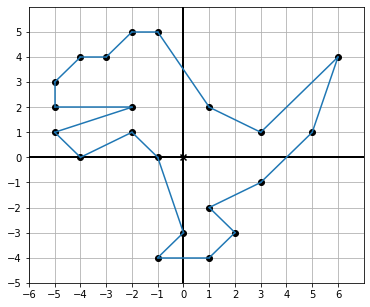

In [2]:
from my_draw2d import draw2d, Points2D, Polygon2D

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]
 
draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors)
)

Let's assume that we want to translate the dinosaur to the right by 3 units and up by 1 one. 

We already know that we can add the vector $ (3, 1) $ to each of the dinosaur's vertices.

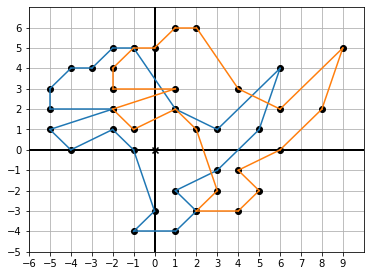

In [5]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_vectors import translate
from my_colors import blue, orange

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

translated_dino_vectors = translate((3, 1), dino_vectors)
 
draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*translated_dino_vectors),
    Polygon2D(*translated_dino_vectors, color=orange)
)

But we want to find a matrix that would result in the same translation. As the translation is not a linear transformation, we know that we wouldn't find a 2x2 matrix that would fit the bill, but if we think of the dinosaur as an inhabitant of 3D space instead of 2D plane, it turns out we can formulate the translation as a matrix.

Let's start by enhancing every 2D point of the dinosaur polygon with a z coordinate of 1.

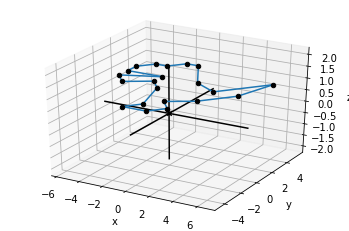

In [7]:
from my_draw3d import draw3d, Points3D, Polygon3D

dino_vectors_2d = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors_2d]


draw3d(
    Points3D(*dino_vectors_3d),
    Polygon3D(*dino_vectors_3d, color=blue)
)

In the 3D space we are not constrained with linear transformation restrictions, and we can try to find a linear map that performs the translation.

As usual, to find the linear map matrix, we need to apply the effect of the transformation to the vectors of the standard basis.

Let's assume this is the effect of the transformation.

$
T(e1) = T((1, 0, 0)) = (1, 0, 0) \\
T(e2) = T((0, 1, 0)) = (0, 1, 0) \\
T(e3) = T((0, 0, 1)) = (3, 1, 1)
$

This means that the transformation leaves $ e1 $ and $ e2 $ unaffected, and transforms $ e3 $ into $ (3, 1, 1) $.

Note also that the transformation of $ e3 $ leaves the z coordinate unaffected, but changes the x and y coordinates of $ e3 $.


As a result:
  
$
T = \begin{pmatrix}
1 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix}
$

Let's see that algebraically, this is exactly what we need:

Let's consider a point in the 2D plane $ (x, y) $. 

We then *upgrade* it to make it a point in the 3D space with a z coordinate of 1, so that it ends up being $ (x, y, 1) $.

Then, applying the transformation above:

$
\begin{pmatrix}
1 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
x \\
y \\
1
\end{pmatrix} = \begin{pmatrix}
1 \cdot x + 0 \cdot y + 3 \\
0 \cdot x + 1 \cdot y + 1 \\
0 \cdot x + 0 \cdot y + 1 \cdot 1
\end{pmatrix} = \begin{pmatrix}
x + 3 \\
y + 1 \\
1
\end{pmatrix}
$

which demonstrates that the matrix gives us the translation we were looking for.

Let's see what happens when we apply this matrix to each of the vertex of the 3d dino:

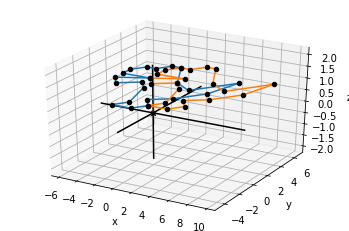

In [11]:
from my_draw3d import draw3d, Points3D, Polygon3D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

dino_vectors_2d = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors_2d]

translation_matrix = (
    (1, 0, 3),
    (0, 1, 1),
    (0, 0, 1)
)

translated_dino_vectors_3d = [multiply_matrix_vector(translation_matrix, v) for v in dino_vectors_3d]


draw3d(
    Points3D(*dino_vectors_3d),
    Polygon3D(*dino_vectors_3d, color=blue),
    Points3D(*translated_dino_vectors_3d),
    Polygon3D(*translated_dino_vectors_3d, color=orange)
)

And now that we have the translation matrix in the 3D space, we can project into the 2D space:

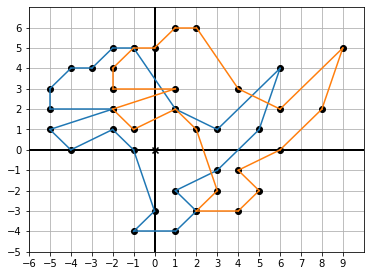

In [12]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

dino_vectors_2d = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors_2d]

translation_matrix = (
    (1, 0, 3),
    (0, 1, 1),
    (0, 0, 1)
)

translated_dino_vectors_3d = [multiply_matrix_vector(translation_matrix, v) for v in dino_vectors_3d]

translated_dino_vectors_2d = [(x, y) for x, y, z in translated_dino_vectors_3d]


draw2d(
    Points2D(*dino_vectors_2d),
    Polygon2D(*dino_vectors_2d, color=blue),
    Points2D(*translated_dino_vectors_2d),
    Polygon2D(*translated_dino_vectors_2d, color=orange)
)

As a summary:

> if you want to translate a collection of 2D vectors by some vector $ (a, b) $, the general steps are as follows:

1. Move the 2D vectors into the plane in 3D space where $ z = 1 $, so that each of the 2D vectors have a z coordinate of 1.

2. Multiply the vectors by the following matrix:
$
\begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
0 & 0 & 1
\end{pmatrix}
$

3. Delete the z-coordinate of all the vectors, that is, project the translated 3D vectors into the x-y plane.

### Combining translations with other linear transformations

If we have a look at the translation matrix, we see that the 2x2 submatrix of the top left corner is the identity transformation. As you can imagine, putting a different 2x2 matrix instead of the identity matrix will have an additional effect, besides the translation.

![Identity submatrix in translation matrix](../images/identity_submatrix_in_translation_matrix.png)

For example, if we put this matrix:

$
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
$

which corresponds to $ \frac{\pi}{2} $ counter-clockwise rotation and we apply it to the dino we will have: 

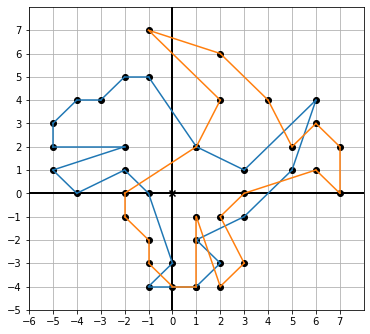

In [3]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

dino_vectors_2d = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors_2d]

rotation_and_translation_matrix = (
    (0, -1, 3),
    (1, 0, 1),
    (0, 0, 1)
)

transformed_dino_vectors_3d = [multiply_matrix_vector(rotation_and_translation_matrix, v) for v in dino_vectors_3d]

transformed_dino_vectors_2d = [(x, y) for x, y, z in transformed_dino_vectors_3d]


draw2d(
    Points2D(*dino_vectors_2d),
    Polygon2D(*dino_vectors_2d, color=blue),
    Points2D(*transformed_dino_vectors_2d),
    Polygon2D(*transformed_dino_vectors_2d, color=orange)
)

In [ ]:
See how the dino has been effectively rotated.

### Translating 3D objects in the 4D world

The same approach can be applied to perform translations in the 3D spaces, only that we would need to *upgrade* our vectors to the 4D world, in which we would have an additional dimension that we can draw.

However, in the same way that we can think of the 3D space as a collection of 2D planes indexed by the z coordinate, we can think of the 4D space as the collection of 3D spaces *over time*. Therefore, one way to make sense of the 4D world is to think of it as the *spacetime. The *spacetime* would be sliced by the values of t.

Mental models aside, vector math works in the same for higher dimensions.

Let's consider now a 3D vector $ (x, y, z) $ that we want to translate by a given vector $ (a, b, c) $. Following the same approach that we used for 2D translations we can assume that the translation matrix will be:

$
\begin{pmatrix}
1 & 0 & 0 & a \\
0 & 1 & 0 & b \\
0 & 0 & 1 & c \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$

so that, when applied to a *3D enhanced* vector in the *4D world*, we would have:

$
\begin{pmatrix}
1 & 0 & 0 & a \\
0 & 1 & 0 & b \\
0 & 0 & 1 & c \\
0 & 0 & 0 & 1 \\
\end{pmatrix} \begin{pmatrix}
x \\
y \\
z \\
1 \\
\end{pmatrix} = \begin{pmatrix}
x + a \\
y + b \\
z + c \\
1
\end{pmatrix}
$

As a result, we can define a function that performs the 3D translation:

In [ ]:
def translate_3d(translation_vector):
    def new_function(target):
        a, b, c = translation
        x, y, z = target
        matrix = (
            (1, 0, 0, a),
            (0, 1, 0, b),
            (0, 0, 1, c),
            (0, 0, 0, 1)
        )
        vector = (x, y, z, 1)
        x_out, y_out, z_out, _ = \
            multiply_matrix_vector(matrix, vector)
        return (x_out, y_out, z_out)
    return new_function

Let's try this translation with the teapot, and the vector (2, 2, -3).

| NOTE: |
| :---- |
| Remember that in OpenGL, z-axis is oriented towards the viewer, and therefore, the translation should place the teapot higher, to the right, and farther away from the viewer. |

In [3]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from my_transformations import polygon_map
from my_matrices import multiply_matrix_vector

def translate_3d(translation_vector):
    def new_function(target):
        a, b, c = translation_vector
        x, y, z = target
        matrix = (
            (1, 0, 0, a),
            (0, 1, 0, b),
            (0, 0, 1, c),
            (0, 0, 0, 1)
        )
        vector = (x, y, z, 1)
        x_out, y_out, z_out, _ = \
            multiply_matrix_vector(matrix, vector)
        return (x_out, y_out, z_out)
    return new_function

draw_model(polygon_map(translate_3d((2, 2, -3)), load_triangles()))



SystemExit: 0

A similar approach we can take for the 2D translation:

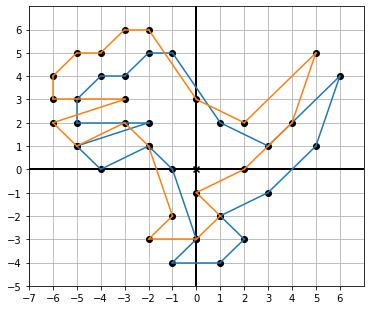

In [7]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

def translate_2d(translation_vector):
    def new_function(v):
        a, b = translation_vector
        x, y = v
        matrix = (
            (1, 0, a),
            (0, 1, b),
            (0, 0, 1)
        )
        upgraded_vector = (x, y, 1)
        x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
        return (x_out, y_out)
    return new_function


dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

translation = translate_2d((-1, 1))

translated_dino_vectors = [translation(v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*translated_dino_vectors),
    Polygon2D(*translated_dino_vectors, color=orange)
)

Now that we have *packaged* the translation in 2D and 3D in matrix we can release them in our libraries of transformations.